# FILTRO PARA POBLACIÓN OBJETIVO

#### Características de la población:
- Locales educativos con gestión pública y directa
- Solo se consideran los perfiles de docentes y auxiliares
- Incluirá a los niveles modulares de primaria e inicial, eliminando secundaria
- Secciones incompletas (?) serán eliminadas

In [1]:
import pandas as pd
import numpy as np
#$ pip install pyjanitor
import configparser
from janitor import clean_names


In [2]:
#path="C:/Users/especialistaopep/OneDrive - Ministerio de Educación/Documentos/1 Quick wins + Agenda estratégica 2022/UPP/Equipo plazas/P2. IA Racio/"
path="D:/OneDrive - Ministerio de Educación/Documentos/1 Quick wins + Agenda estratégica 2022/UPP/Equipo plazas/P2. IA Racio/"

base=pd.read_csv(path+'Base consolidada.csv') # Última base al 0107

# Limpieza de cod_mod y niv_mod
base = base.drop(base[base.cod_mod=='S150205'].index)
base = base[base['niv_mod'].notnull()]

base.head()
#print(base['niv_mod'].isnull().sum())

D:\Programas\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,122) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,cod_mod,codlocal,dir_n,dir_c,sub_dir_n,sub_dir_c,jer_n,jer_c,doc_aula_n,...,region,tipo_entidad,jec,ruralidad,vraem,frontera,bilingue,caracteristica,year,Unnamed: 0.1
0,0,2212,427658.0,0,0,0,0,0,0,3,...,PIURA,UGEL EJECUTORA,JEC,Rural 1,No Vraem,No frontera,No bilingue,Completo,2020,NaN
1,1,200014,53828.0,0,0,0,0,0,0,2,...,APURIMAC,UGEL EJECUTORA,NaN,Rural 2,No Vraem,No frontera,Bilingue,Multigrado,2020,NaN
2,2,200022,53833.0,0,0,0,0,0,0,1,...,APURIMAC,UGEL EJECUTORA,NaN,Rural 2,No Vraem,No frontera,Bilingue,Unidocente,2020,NaN
3,3,200030,53847.0,0,0,0,0,0,0,2,...,APURIMAC,UGEL EJECUTORA,NaN,Rural 2,No Vraem,No frontera,Bilingue,Multigrado,2020,NaN
4,4,200048,53852.0,0,0,0,0,0,0,2,...,APURIMAC,UGEL EJECUTORA,NaN,Rural 2,No Vraem,No frontera,Bilingue,Multigrado,2020,NaN


* Estas son mis variables finales:

In [3]:
# Nombres de columnas
my_list = list(base)
print (my_list)

['Unnamed: 0', 'cod_mod', 'codlocal', 'dir_n', 'dir_c', 'sub_dir_n', 'sub_dir_c', 'jer_n', 'jer_c', 'doc_aula_n', 'doc_aula_c', 'otro_doc_n', 'otro_doc_c', 'aux_n', 'aux_c', 'cant0 (t)', 'cant1 (t)', 'cant2 (t)', 'cant3 (t)', 'cant4 (t)', 'cant5 (t)', 'cant6 (t)', 'inclu0 (t)', 'inclu1 (t)', 'inclu2 (t)', 'inclu3 (t)', 'inclu4 (t)', 'inclu5 (t)', 'inclu6 (t)', 'cant0 (t-4)', 'cant1 (t-4)', 'cant2 (t-4)', 'cant3 (t-4)', 'cant4 (t-4)', 'cant5 (t-4)', 'cant6 (t-4)', 'inclu0 (t-4)', 'inclu1 (t-4)', 'inclu2 (t-4)', 'inclu3 (t-4)', 'inclu4 (t-4)', 'inclu5 (t-4)', 'inclu6 (t-4)', 'cant0 (t-3)', 'cant1 (t-3)', 'cant2 (t-3)', 'cant3 (t-3)', 'cant4 (t-3)', 'cant5 (t-3)', 'cant6 (t-3)', 'inclu0 (t-3)', 'inclu1 (t-3)', 'inclu2 (t-3)', 'inclu3 (t-3)', 'inclu4 (t-3)', 'inclu5 (t-3)', 'inclu6 (t-3)', 'cant0 (t-2)', 'cant1 (t-2)', 'cant2 (t-2)', 'cant3 (t-2)', 'cant4 (t-2)', 'cant5 (t-2)', 'cant6 (t-2)', 'inclu0 (t-2)', 'inclu1 (t-2)', 'inclu2 (t-2)', 'inclu3 (t-2)', 'inclu4 (t-2)', 'inclu5 (t-2)', 'i

In [4]:
base['caracteristica'].value_counts()

Completo      79375
Unidocente    65288
Multigrado    48062
Name: caracteristica, dtype: int64

#### 1. Nos quedamos con locales educativos de gestión pública directa

In [5]:
base = base.loc[base['d_gestion'] == 'P£blica de gesti¢n directa']

#### 2. Solo guardamos perfiles de docentes y auxiliares

In [6]:
base['req_dir'] = 0
base['req_sub'] = 0
base['req_jer'] = 0
base['req_fisica'] = 0
base['req_aip'] = 0
base['director_exd_2020'] = 0
base['subdirector_exd_2020'] = 0
base['jerarquico_exd_2020'] = 0
base['director_exd_2021'] = 0
base['subdirector_exd_2021'] = 0
base['jerarquico_exd_2021'] = 0

del base['req_dir']
del base['req_sub']
del base['req_jer']
del base['req_fisica']
del base['req_aip']
del base['director_exd_2020']
del base['subdirector_exd_2020']
del base['jerarquico_exd_2020']
del base['director_exd_2021']
del base['subdirector_exd_2021']
del base['jerarquico_exd_2021']

#### 3. Eliminamos el nivel modular de secundaria

base['niv_mod'].value_counts()

In [7]:
base = base.loc[base['niv_mod'] != 'F0']

# AJUSTES PREVIOS PARA CÁLCULOS

- Hacemos algunos ajustes sobre la base de datos, sobre los tipos de variables, que será útiles para los cálculos posteriores:

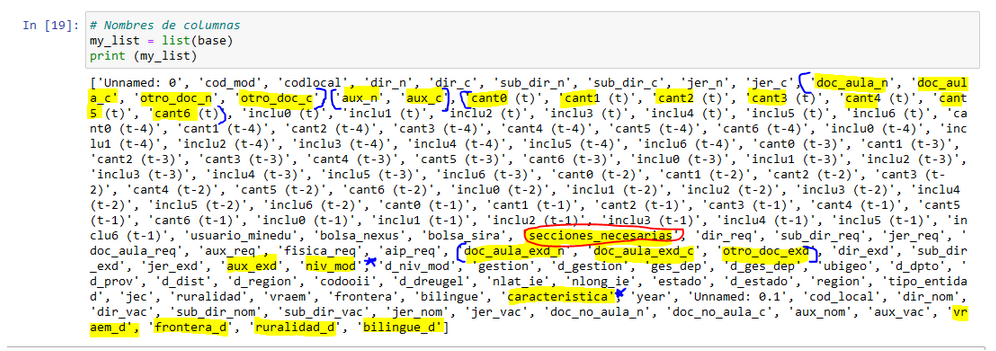

1. Existen algunos NaN en la cantidad de alumnos matriculados. Se duplicará la cantidad del año pasado (t-1) y así sucesivamente de forma temporal hasta tener un número en la matrícula. Se eliminarán los null sobrantes

In [8]:
####for j in range(7):
    ####for i in range(2,5):
        ####base.loc[base[f"cant{j} (t)"].isnull(),f"cant{j} (t)"]=base[f"cant{j} (t-{i-1})"]

In [9]:
# Eliminamos las 43 IIEE que no tienen nada de información en su matrícula (ni de year T ni de años pasados).
# Eliminar los NaN es importante para el SMOTE (revisar si tmb aplica para SMOTENC)
for j in range(7):
    base = base[~base[f'cant{j} (t)'].isnull()]
    
for j in range(7):
    for i in range(1,5):
        base = base[~base[f'cant{j} (t-{i})'].isnull()]

In [10]:
print(base['cant6 (t-1)'].isnull().sum())

0


2. Las variables de vulnerabilidad eran float, y pasarán a ser dicotómicas

In [11]:
# Dicotomizar ruralidad:
dummies_ruralidad=pd.get_dummies(base["ruralidad"], drop_first = True ) # Se eliminó la primera que es Rural 1
base= pd.concat([base, dummies_ruralidad], axis = 1)
base = base.drop(columns=['ruralidad']) 

# Dicotomizar vraem:
dummies_vraem=pd.get_dummies(base["vraem"], drop_first = True ) # Se eliminó la primera que es No Vraem
base= pd.concat([base, dummies_vraem], axis = 1)
base = base.drop(columns=['vraem']) 

# Dicotomizar frontera:
dummies_frontera=pd.get_dummies(base["frontera"], drop_first = True ) # Se eliminó la primera que es Frontera
base= pd.concat([base, dummies_frontera], axis = 1)
base = base.drop(columns=['frontera']) 

# Dicotomizar bilingue:
dummies_bilingue=pd.get_dummies(base["bilingue"], drop_first = True ) # Se eliminó la primera que es Bilingue
base= pd.concat([base, dummies_bilingue], axis = 1)
base = base.drop(columns=['bilingue']) 

# Dicotomizar caracteristica:
dummies_caracteristica=pd.get_dummies(base["caracteristica"], drop_first = True ) # Se eliminó la primera que es polidocente
base= pd.concat([base, dummies_caracteristica], axis = 1)
base = base.drop(columns=['caracteristica']) 

# Dicotomizar niv_mod:
dummies_nivmod=pd.get_dummies(base["niv_mod"], drop_first = True ) # Se eliminó la primera que es A1
base= pd.concat([base, dummies_nivmod], axis = 1)
base = base.drop(columns=['niv_mod']) 

In [12]:
# Normalizando el nombre de las nuevas variables damizadas
base=clean_names(base)
#columns_names = base.columns.values  
#columns_names_list = list(columns_names)
#columns_names_list
my_list = list(base)
print (my_list)

['unnamed_0', 'cod_mod', 'codlocal', 'dir_n', 'dir_c', 'sub_dir_n', 'sub_dir_c', 'jer_n', 'jer_c', 'doc_aula_n', 'doc_aula_c', 'otro_doc_n', 'otro_doc_c', 'aux_n', 'aux_c', 'cant0_t_', 'cant1_t_', 'cant2_t_', 'cant3_t_', 'cant4_t_', 'cant5_t_', 'cant6_t_', 'inclu0_t_', 'inclu1_t_', 'inclu2_t_', 'inclu3_t_', 'inclu4_t_', 'inclu5_t_', 'inclu6_t_', 'cant0_t_4_', 'cant1_t_4_', 'cant2_t_4_', 'cant3_t_4_', 'cant4_t_4_', 'cant5_t_4_', 'cant6_t_4_', 'inclu0_t_4_', 'inclu1_t_4_', 'inclu2_t_4_', 'inclu3_t_4_', 'inclu4_t_4_', 'inclu5_t_4_', 'inclu6_t_4_', 'cant0_t_3_', 'cant1_t_3_', 'cant2_t_3_', 'cant3_t_3_', 'cant4_t_3_', 'cant5_t_3_', 'cant6_t_3_', 'inclu0_t_3_', 'inclu1_t_3_', 'inclu2_t_3_', 'inclu3_t_3_', 'inclu4_t_3_', 'inclu5_t_3_', 'inclu6_t_3_', 'cant0_t_2_', 'cant1_t_2_', 'cant2_t_2_', 'cant3_t_2_', 'cant4_t_2_', 'cant5_t_2_', 'cant6_t_2_', 'inclu0_t_2_', 'inclu1_t_2_', 'inclu2_t_2_', 'inclu3_t_2_', 'inclu4_t_2_', 'inclu5_t_2_', 'inclu6_t_2_', 'cant0_t_1_', 'cant1_t_1_', 'cant2_t_1_', '

3. Volveré dummys las variables cualitativas (niv_mod y caracteristica)

4. Sumaré toda la cantidad de matrícula para el año t (Variable: np_cant)

In [13]:
#base['np_cant'] = 0

#for x in range(1, 7):
    #base[f'np_cant{x}_t_'] = np.array(base[f'cant{x}_t_'])
    #base['np_cant'] = base['np_cant'] + base[f'np_cant{x}_t_']

In [14]:
#print(base['np_cant'].isnull().sum())

5. Sumaré toda la cantidad de docentes y auxiliares, indiferente de contratado y nombrado

In [15]:
base[f'doc_aula_n'] = np.array(base[f'doc_aula_n'])
base[f'doc_aula_c'] = np.array(base[f'doc_aula_c'])
base[f'otro_doc_n'] = np.array(base[f'otro_doc_n'])
base[f'otro_doc_c'] = np.array(base[f'otro_doc_c'])
base[f'aux_n'] = np.array(base[f'aux_n'])
base[f'aux_c'] = np.array(base[f'aux_c'])
base[f'doc_aula_exd_n'] = np.array(base[f'doc_aula_exd_n'])
base[f'doc_aula_exd_c'] = np.array(base[f'doc_aula_exd_c'])
base[f'otro_doc_exd'] = np.array(base[f'otro_doc_exd'])

In [16]:
#base[f'doc_aula'] = base[f'doc_aula_n'] + base[f'doc_aula_c']
#base[f'otro_doc'] = base[f'otro_doc_n'] + base[f'otro_doc_c']
#base[f'aux'] = base[f'aux_n'] + base[f'aux_c']
#base[f'doc_aula_exd'] = base[f'doc_aula_exd_n'] + base[f'doc_aula_exd_c'] + base[f'otro_doc_exd']

# BALANCEO DEL TRAIN SET

- Para poder estratificar el test y train set, debemos tener observaciones (n_samples) > 1 ocurrencia. Sin embargo, en algunos casos no vamos a poder obtener esta información. Por lo tanto, vamos a duplicar esas observaciones para poder continuar

In [17]:
all_keys = base['secciones_necesarias'].unique().tolist()
#all_keys

base['indicador'] = "no única"

for key in all_keys:
    #print(key)
    if base.loc[base['secciones_necesarias']==key].shape[0] < 2 :
        #t_df = t_df.append(df.loc[df['Key']==key])
        base.loc[base['secciones_necesarias']==key,'indicador'] = "única"

   # else:
    #    print("ok")
    
is_unica =  base['indicador'] == "única" 
df_try = base[is_unica]
base=base.append(df_try*1)

- Las observaciones con número de ocurrencias (n_samples) = 2 causan un problema al no tener suficientes n_neighbors para poder hacer el smote, por lo tanto vamos a duplicar esas observaciones también 

In [18]:
all_keys = base['secciones_necesarias'].unique().tolist()
base['indicador_2'] = "no única" 

for key in all_keys:
    #print(key)
    if base.loc[base['secciones_necesarias']==key].shape[0] < 3 :
        #t_df = t_df.append(df.loc[df['Key']==key])
        base.loc[base['secciones_necesarias']==key,'indicador_2'] = "única"

   # else:
    #    print("ok")
    
is_unica_2 =  base['indicador_2'] == "única" 
df_try = base[is_unica_2]
df_try = df_try.drop_duplicates(keep='first',inplace=False) # Solo considero una copia única de las repetidas para agregar
base=base.append(df_try*1)

- A pesar de esta duplicidad, he tenido que eliminar las observaciones con una frecuencia (n_samples) < n_neighbors (=3) mínimo que me permite el SMOTE. Ya tenía un n_samples igual a 3, pero no lo lee, parece que estaban muy separados para generar un neighbor

In [19]:
# VOY A PROBAR BORRÁNDOLAS:

all_keys = base['secciones_necesarias'].unique().tolist()
#base['indicador_3'] = "conservar"

for key in all_keys:
    if base.loc[base['secciones_necesarias']==key].shape[0] < 4 :
        base = base[base.secciones_necesarias != key]
        #base = base.loc[base['secciones_necesarias']==key,'indicador_3'] = "borrar"

#base = base[base.indicador_3 == "conservar"]

In [20]:
base.to_csv(path + 'prueba.csv', index = False)

- Se usará data augmentation para los niveles modulares mediante SMOTE, una versión alterada del oversampling

In [21]:
#Elimino las variables que no sirven para el modelo
# Definimos el "x" e "y"

base.reset_index()

Y=base['secciones_necesarias'] 
X=base[['urbano','rural_2','rural_3','vraem','no_frontera','no_bilingue','a2','a3','b0','unidocente','multigrado','doc_aula_exd_n','doc_aula_exd_c','aux_exd','doc_aula_n','doc_aula_c','otro_doc_n','otro_doc_c','aux_n','aux_c','cant0_t_', 'cant1_t_', 'cant2_t_', 'cant3_t_', 'cant4_t_', 'cant5_t_', 'cant6_t_', 'inclu0_t_', 'inclu1_t_', 'inclu2_t_', 'inclu3_t_', 'inclu4_t_', 'inclu5_t_', 'inclu6_t_', 'cant0_t_4_', 'cant1_t_4_', 'cant2_t_4_', 'cant3_t_4_', 'cant4_t_4_', 'cant5_t_4_', 'cant6_t_4_', 'inclu0_t_4_', 'inclu1_t_4_', 'inclu2_t_4_', 'inclu3_t_4_', 'inclu4_t_4_', 'inclu5_t_4_', 'inclu6_t_4_', 'cant0_t_3_', 'cant1_t_3_', 'cant2_t_3_', 'cant3_t_3_', 'cant4_t_3_', 'cant5_t_3_', 'cant6_t_3_', 'inclu0_t_3_', 'inclu1_t_3_', 'inclu2_t_3_', 'inclu3_t_3_', 'inclu4_t_3_', 'inclu5_t_3_', 'inclu6_t_3_', 'cant0_t_2_', 'cant1_t_2_', 'cant2_t_2_', 'cant3_t_2_', 'cant4_t_2_', 'cant5_t_2_', 'cant6_t_2_', 'inclu0_t_2_', 'inclu1_t_2_', 'inclu2_t_2_', 'inclu3_t_2_', 'inclu4_t_2_', 'inclu5_t_2_', 'inclu6_t_2_', 'cant0_t_1_', 'cant1_t_1_', 'cant2_t_1_', 'cant3_t_1_', 'cant4_t_1_', 'cant5_t_1_', 'cant6_t_1_', 'inclu0_t_1_', 'inclu1_t_1_', 'inclu2_t_1_', 'inclu3_t_1_', 'inclu4_t_1_', 'inclu5_t_1_', 'inclu6_t_1_']]

X.info() # Vemos que no hay nulos para iniciar nuestra programación en SMOTE 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155116 entries, 1 to 132519
Data columns (total 90 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   urbano          155116 non-null  uint8  
 1   rural_2         155116 non-null  uint8  
 2   rural_3         155116 non-null  uint8  
 3   vraem           155116 non-null  uint8  
 4   no_frontera     155116 non-null  uint8  
 5   no_bilingue     155116 non-null  uint8  
 6   a2              155116 non-null  uint8  
 7   a3              155116 non-null  uint8  
 8   b0              155116 non-null  uint8  
 9   unidocente      155116 non-null  uint8  
 10  multigrado      155116 non-null  uint8  
 11  doc_aula_exd_n  155116 non-null  float64
 12  doc_aula_exd_c  155116 non-null  float64
 13  aux_exd         155116 non-null  float64
 14  doc_aula_n      155116 non-null  int64  
 15  doc_aula_c      155116 non-null  int64  
 16  otro_doc_n      155116 non-null  int64  
 17  otro_doc_c

In [22]:
X.head()

,urbano,rural_2,rural_3,vraem,no_frontera,no_bilingue,a2,a3,b0,unidocente,...,cant4_t_1_,cant5_t_1_,cant6_t_1_,inclu0_t_1_,inclu1_t_1_,inclu2_t_1_,inclu3_t_1_,inclu4_t_1_,inclu5_t_1_,inclu6_t_1_
1,0,1,0,0,1,0,0,0,1,0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,1,0,0,0,1,1,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,1,0,0,0,1,0,...,3.0,6.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,1,0,0,1,0,0,0,1,0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,0,1,0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Se generarán primero estos subgrupos (training y test) para luego aplicar alguna técnica de balanceo sobre el training test, y obtener estimaciones que puedan ser replicadas en el test set
- Se utilizará una división aleatoria para ambos subsettings, con una muestra estratificada centrada en la variabla dependiente

In [23]:
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30,stratify=Y)

print("Ejemplos usados para entrenar: ", len(X_train))
print("Ejemplos usados para test: ", len(X_test))

Ejemplos usados para entrenar:  108581
Ejemplos usados para test:  46535


In [24]:
X_train.to_csv('Training and test/X_train.csv',index=False)
X_test.to_csv('Training and test/X_test.csv',index=False)
Y_train.to_csv('Training and test/Y_train.csv',index=False)
Y_test.to_csv('Training and test/Y_test.csv',index=False)

In [25]:
# Y_train.pivot_table(index='niv_mod', aggfunc='size').plot(kind='bar', title='Verificación de distribución entre base y train')

In [26]:
#!pip install imblearn --user
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

#cat_col_index = list(range(len(num_cols_names),59))

os = SMOTE(random_state = 100, k_neighbors=2) # Oversample: OS
#os = SMOTENC(categorical_features=[base.dtypes==object], random_state=123, sampling_strategy='auto')

#X_resampled, y_resampled = SMOTE().fit_resample(train[['niv_mod','ruralidad','vraem','frontera','bilingue']], train['secciones_necesarias'])
# Independientes / Dependiente

## transform the dataset
#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)
## summarize the new class distribution
#counter = Counter(y)
#print(counter)
## scatter plot of examples by class label
#for label, _ in counter.items():
#	row_ix = where(y == label)[0]
#	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
#pyplot.legend()
#pyplot.show()

In [27]:
#Balanceando la data entrenamiento
os_data_X, os_data_Y = os.fit_resample(X_train.values, Y_train.values)

In [28]:
from collections import Counter
counter = Counter(os_data_Y)
print(counter) ## Se multiplicaron hasta alcanzar el mismo número para todos los samples, sería correcto?

Counter({3: 42824, 1: 42824, 6: 42824, 4: 42824, 2: 42824, 16: 42824, 9: 42824, 12: 42824, 7: 42824, 14: 42824, 35: 42824, 5: 42824, 11: 42824, 21: 42824, 24: 42824, 22: 42824, 39: 42824, 17: 42824, 18: 42824, 0: 42824, 10: 42824, 13: 42824, 8: 42824, 28: 42824, 26: 42824, 23: 42824, 20: 42824, 49: 42824, 31: 42824, 29: 42824, 34: 42824, 15: 42824, 30: 42824, 25: 42824, 42: 42824, 19: 42824, 33: 42824, 43: 42824, 45: 42824, 27: 42824, 36: 42824, 54: 42824, 48: 42824, 41: 42824, 40: 42824, 47: 42824, 32: 42824, 37: 42824, 38: 42824, 44: 42824, 80: 42824, 51: 42824, 52: 42824, 56: 42824, 46: 42824})
